### Table of content: 

<a href='#Описание проекта'>1. Project Description</a>

<a href='#Аналитика средствами Python'>2. Analytics with Python and SQL</a>

<a href='#Выводы'>3. Conclusion</a>

# Project Description
<a id='Начало'></a>
<a id='Описание проекта'></a>

"F9" is a Russian airline that operates domestic passenger air services. Hundreds of flights every day. It is important to understand the preferences of users who buy tickets to certain destinations.
It is necessary to study the database and analyze the passenger demand for flights to the cities where the largest festivals are held.

**Description of data
Air Freight Database:**
    
The `airports` table - information about airports:
    
- airport_code - three-letter airport code
- airport_name - airport name
- city - city
- timezone - time zone

`Aircrafts` table - aircraft information:
    
- aircraft_code - aircraft model code
- model - aircraft model
- range - number of aircraft

The `tickets` table - information about tickets:
    
- ticket_no - unique ticket number
- passenger_id - personal identifier of the passenger
- passenger_name - passenger's first and last name

Table `flights` - information about flights:
    
- flight_id - unique flight identifier
- departure_airport - departure airport
- departure_time - date and time of departure
- arrival_airport - arrival airport
- arrival_time - date and time of arrival
- aircraft_code - aircraft id

The `ticket_flights` table - a flight-to-ticket splice table

- ticket_no - ticket number
- flight_id - flight identifier

Table `festivals` - information about festivals

- festival_id - unique number of the festival
- festival_date - the date of the festival
- festival_city - the city of the festival
- festival_name - the name of the festival

**Table schema**

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://pictures.s3.yandex.net/resources/photo_2019-11-08_14-08-31_1573733426.jpg')

Explanation: There is no direct relationship in the database between the `airports` and `festivals` tables, or `festivals` and `flights` tables. But you can write JOIN and link these tables by the city of the festival (festival_city) and the city of the airport (city). Some conversion of dates to `flights` is required, and then this table can also be linked by the date of the festival (` festival_date`) in requests with JOIN.

### Task 1 - Data Mining

Write a parser to collect data on the 11 largest festivals of 2018 from the site. Save the data to the festivals dataframe and display it.
link: https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html

### Task 2 - SQL Requests

Find information in SQL Database.

### Task 3 - Data Analysis

You have files that contain the results of SQL queries from previous jobs.

/datasets/query_1.csv - The result of the first query. It contains information about:
- model - aircraft model
- flights_amount - number of flights for each model aircraft model in September 2018

/datasets/query_3.csv - the result of the third query. It contains information about:
- city - cities
- average_flights - the average number of flights arriving in the city per day in August 2018

These two datasets require:

  - import files;
  - examine the data in them;
  - check data types for correctness;
  - choose the top 10 cities by the number of flights;
  - build graphs: aircraft models and the number of flights, cities and the number of flights, top 10 cities and the number of flights;
  - draw conclusions for each of the graphs, explain the result.
  

## Analytics with Python and SQL
<a id='Аналитика средствами Python'></a>

### Data Mining

In [6]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# make better view for tables
from IPython.display import display
from IPython.display import Image
from IPython.core.display import HTML

URL = 'https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'
req = requests.get(URL)

soup = BeautifulSoup(req.text,'lxml')
table = soup.find('table', attrs = {'id':"best_festivals"})

heading_table = []
for row in table.find_all('th'):
    heading_table.append(row.text)

name_fest = []
place = []
date_fest = []
i = 1

for row in table.find_all('td'):
    if i % 3 == 1:
        if not row.find_all('th'):
            name_fest.append(row.text)
            i += 1
    elif i % 3 == 2:
        if not row.find_all('th'):
            place.append(row.text)
            i += 1
    elif i % 3 == 0:
        if not row.find_all('th'):
            date_fest.append(row.text)
            i += 1

festivals = pd.DataFrame()
festivals['name_fest'] = name_fest
festivals['place'] = place
festivals['date_fest'] = date_fest

festivals.columns = heading_table

display(festivals)

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


### SQL Requests

Examine the airports table and list the `cities` that have airports.

Examine the `flights` table and count the number of departures `flight_id` from each departure airport `departure_airport`. Name the variable `cnt_flights` and print it along with the column `departure_airport` - first `departure_airport`, then `cnt_flights`. Sort the result in descending order of the number of departures.

Find the number of flights on each aircraft model departing in September 2018. Name the resulting column `flights_amount` and print it, also print the column` model`.
Print the columns in this order:
- `model`
- `flights_amount`

Count the number of flights across all Boeing, Airbus and 'other' aircraft models in September. Put the model types in the `type_aircraft` column and the number of flights in the `flights_amount` column. Display them on the screen.

Calculate the average number of arriving flights per day for each city for August 2018. Name the resulting field `average_flights`, print the column` city` with it.
Display columns in this order:
- `city`,
- `average_flights`.

Set the festivals that took place from July 23 to September 30, 2018 in Moscow, and the number of the week in which they took place. Print the name of the festival `festival_name` and the number of the week` festival_week`.

For each week from July 23 to September 30, 2018, count the number of tickets purchased for flights to Moscow (week number `week_number` and number of tickets` ticket_amount`). Get a table with information on the number of tickets purchased per week; a mark if the festival took place this week; festival name `festival_name` and week number` week_number`.
Display columns in this order:
- `week_number`
- `ticket_amount`
- `festival_week`
- `festival_name`

### Data Analysis

In [2]:
# import Pandas
import pandas as pd

# set settings for display option
pd.set_option('display.max_columns', 500)

# make better view for tables
from IPython.display import display

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

In [4]:
display(query_1.head(10))
print(query_1.info())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


In [5]:
display(query_3.head())
print(query_3.info())

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


In [6]:
display(query_3.sort_values(by = 'average_flights', ascending = False).head(10))


,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


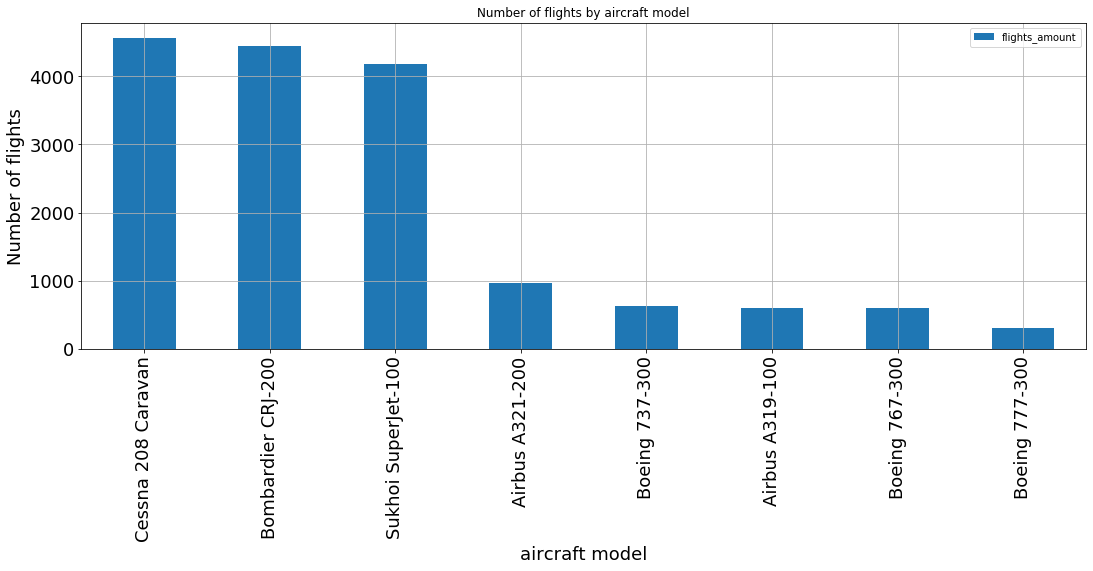

In [7]:
import matplotlib.pyplot as plt
query_1.sort_values(by = 'flights_amount', ascending = False).plot(
    kind = 'bar', 
    x = 'model',
    grid = True,
    figsize = (18,6),
    title = 'Number of flights by aircraft model',
    fontsize=18);
plt.xlabel('aircraft model', fontsize=18);
plt.ylabel('Number of flights', fontsize=18);

In [8]:
def city(row):
    if row['average_flights'] < 9.58:
        return 'остальные'
    else:
        return row['city']
    
query_3['group_city'] = query_3.apply(city, axis = 1)   

In [9]:
query_3.head()

,city,average_flights,group_city
0,Абакан,3.870968,остальные
1,Анадырь,1.000000,остальные
2,Анапа,2.161290,остальные
3,Архангельск,5.354839,остальные
4,Астрахань,2.451613,остальные


In [10]:
pivot_table = query_3.pivot_table(index = 'group_city', values = 'average_flights', aggfunc = 'median')
pivot_table.head()

,average_flights
group_city,
Брянск,10.000000
Екатеринбург,11.322581
Красноярск,11.580645
Москва,129.774194
Новосибирск,17.322581


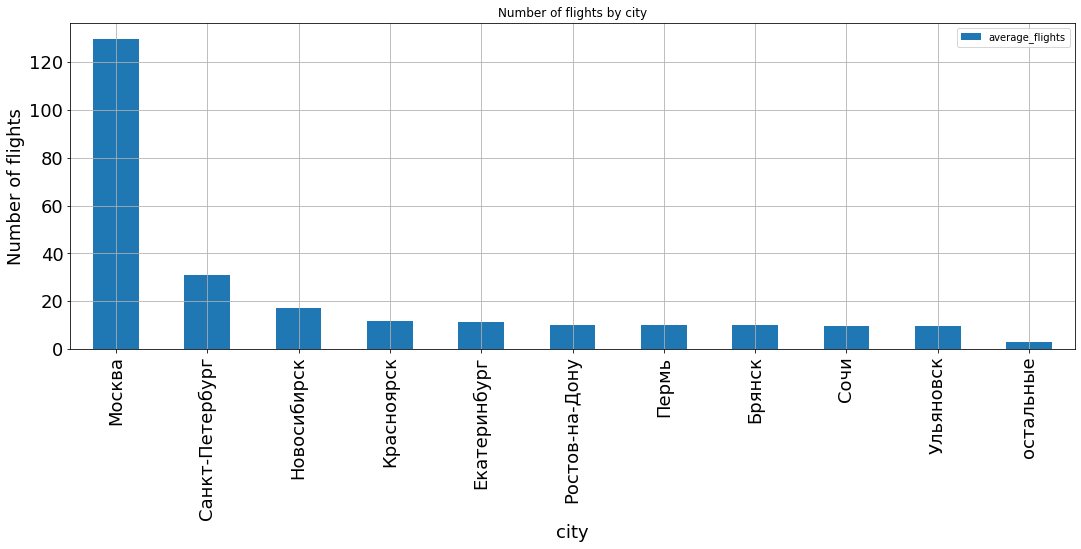

In [11]:
pivot_table.sort_values(by = 'average_flights', ascending = False).plot(
    kind = 'bar', 
    grid = True,
    figsize = (18,6),
    title = 'Number of flights by city',
    fontsize=18);
plt.xlabel('city', fontsize=18);
plt.ylabel('Number of flights', fontsize=18);

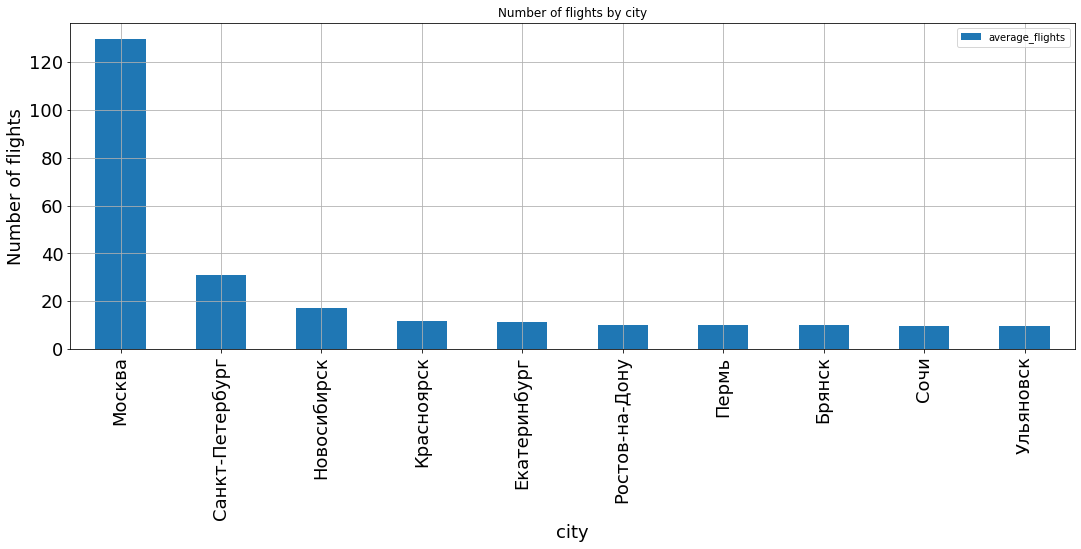

In [12]:
query_3.sort_values(by = 'average_flights', ascending = False).head(10).plot(
    kind = 'bar', 
    x = 'city',
    grid = True,
    figsize = (18,6),
    title = 'Number of flights by city',
    fontsize=18);
plt.xlabel('city', fontsize=18);
plt.ylabel('Number of flights', fontsize=18);

## Conclusions
<a id='Выводы'></a>

The available datasets query_1 (aircraft model and number of flights) and query_3 (city and average number of flights) contain information of the correct type:

1. Airplane model records - string data type
2. Number of flights - integer data type
3. City - string data type
4. Average Flights - Floating Point Data Type

**No gaps, columns are spelled correctly (lower case, no spaces).**

The airline's fleet consists of 8 aircraft models (arranged in descending order of the number of flights):
- Cessna 208 Caravan - 4557 flights
- Bombardier CRJ-200 - 4446 flights
- Sukhoi SuperJet-100 - 4185 flights
- Airbus A321-200 - 960 flights
- Boeing 737-300 - 630 flights
- Airbus A319-100 - 607 flights
- Boeing 767-300 - 600 flights
- Boeing 777-300 - 300 flights

**The first three aircraft models make a much larger number of flights, therefore the airline's fleet mainly consists of: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100**


Top 10 cities by the number of flights per day (rounded to the nearest whole number):
- Moscow - 130 flights per day
- St. Petersburg - 31 flights per day
- Novosibirsk - 17 flights per day
- Krasnoyarsk - 12 flights per day
- Yekaterinburg - 11 flights per day
- Rostov-on-Don - 10 flights per day
- Perm - 10 flights per day
- Bryansk - 10 flights per day
- Sochi - 10 flights per day
- Ulyanovsk - 10 flights per day

**Moscow is a strong leader in terms of the number of flights per day - 130 flights per day, without information on the airport capacity it is impossible to tell about the congestion of Moscow airports, most likely - they are heavily loaded. This is followed by St. Petersburg - 31 flights per day and Novosibirsk - 17 flights per day. In other cities no more than 10 times a day.**